In [1]:
import pandas as pd
import numpy as np
from scipy import stats


import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('ab_data.csv')

In [4]:
df.shape

(294478, 5)

In [5]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [7]:
df.isna().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

In [10]:
df['group'].value_counts(normalize = True)

treatment    0.500126
control      0.499874
Name: group, dtype: float64

In [11]:
df.shape

(294478, 5)

In [15]:
df['user_id'].nunique()

290584

In [17]:
df[['user_id', 'group', 'landing_page']].value_counts()

user_id  group      landing_page
773192   treatment  new_page        2
840613   treatment  new_page        1
840667   control    old_page        1
840666   control    old_page        1
840664   treatment  new_page        1
                                   ..
735267   treatment  new_page        1
735268   control    old_page        1
735270   control    old_page        1
735271   control    old_page        1
945999   treatment  new_page        1
Length: 294477, dtype: int64

In [18]:
pd.crosstab(df['group'], df['landing_page'])

landing_page,new_page,old_page
group,,
control,1928,145274
treatment,145311,1965


In [20]:
idx_control_new_page = (df['group'] =='control') & (df['landing_page'] == 'new_page')

In [21]:
idx_treatment_old_page = (df['group'] =='treatment') & (df['landing_page'] == 'old_page')

In [28]:
df = df[~(idx_treatment_old_page | idx_control_new_page)]

In [29]:
pd.crosstab(df['group'], df['landing_page'])

landing_page,new_page,old_page
group,,
control,0,145274
treatment,145311,0


In [31]:
df['converted'].mean()*100

11.959667567149026

In [36]:
pct_control = df[(df['group'] =='control')]['converted'].mean()*100
print(pct_control)

12.03863045004612


In [37]:
pct_treatment = df[(df['group'] =='treatment')]['converted'].mean()*100
print(pct_treatment)

11.880724790277405


### test statistics

In [39]:
observed_pct_diff = pct_treatment - pct_control
print(observed_pct_diff)

-0.15790565976871562


### Permutation Test

In [48]:
n_perms = 1000
perm_pct_diffs = np.zeros(n_perms)
df_simulation = df.copy() 

for i in range(n_perms):
    df_simulation["converted"] = np.random.permutation(df["converted"])
    pct_control = len(df_simulation.query("(converted == 1) & (group == 'control')"))/len(df_simulation.query("group == 'control'"))*100
    pct_treatment = len(df_simulation.query("(converted == 1) & (group == 'treatment')"))/len(df_simulation.query("group == 'treatment'"))*100
    permuted_diff = pct_treatment - pct_control
    perm_pct_diffs[i] = permuted_diff

In [50]:
perm_pct_diffs[:5]

array([-0.06017178,  0.04582131,  0.03067944,  0.03480904,  0.03343251])

In [53]:
perm_pct_diffs.mean()

-0.004203298242412916

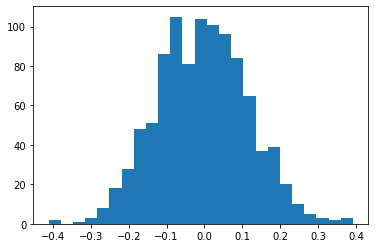

In [52]:
plt.hist(perm_pct_diffs, bins  =25)
plt.show()

In [57]:
100*((perm_pct_diffs <= observed_pct_diff).sum() / n_perms)

10.5